## Ford_Gobike_Systems
## by Subaru Goto

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This service has started since June 2017. Therefore, there is data from June 2017 to December 2018. The data set can be downloaded from https://www.fordgobike.com/system-data .

In [181]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set_style("whitegrid")
%matplotlib inline

In [182]:
# open several zip files
# http://cracktechinterviews.com/Article.aspx?BlogID=21&Title=How-to-import-multiple-files-into-Pandas-data-frame-efficiently?
# get all the zip files
zip_files = glob.glob('2018*-fordgobike-tripdata.csv.zip')
# initialize the list for data frame
file_lists = []

for file in zip_files:
    
    data = pd.read_csv(file, header = 0, sep = ",")
    file_lists.append(data)

# merge
df_2018 = pd.concat(file_lists, ignore_index = True)

In [183]:
# check df
df_2018.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No
1863720,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,NaN,NaN,No


In [184]:
# check info
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [185]:
# check na
df_2018.isna().sum() / df_2018.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.006316
start_station_name         0.006316
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.006316
end_station_name           0.006316
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.059407
member_gender              0.059219
bike_share_for_all_trip    0.000000
dtype: float64

In [186]:
# check summary statistics
df_2018.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [187]:
# load 2017 data into data frames
df_2017 = pd.read_csv("2017-fordgobike-tripdata.csv")

In [188]:
# check head
df_2017.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [189]:
# check na
df_2017.isna().sum() / df_2017.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.000000
start_station_name         0.000000
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.000000
end_station_name           0.000000
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.128037
member_gender              0.127885
dtype: float64

In [190]:
# check shape
print(df_2018.shape)
print(df_2017.shape)

(1863721, 16)
(519700, 15)


In [191]:
# check columns name
df_2018.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [192]:
# # check columns name
df_2017.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')

## What is the structure of your dataset?

> Adding the both data sets, there are 2383421 observations in total. A number of columns is 16 for the 2018 data set and 15 for the 2017 data set. Before we start analyzing data, data cleaning is essential.
Following points should be checked in the data set.

### Quality issue

- missing value for start and end station id as well as name
- missing gender
- missing birth of year
- start and end time is string
- station id is float
- bike id is int
- gender is string
- bike share service is string
- bike share service column is missing in the 2017 data set
- user type is string
- duration in second is difficult to handle with
- member_birth_year is difficult to handle with

### Structure issue

- merge 2 data set together
- start time and end time contains dates and times

## Clean
### Defition
concatinate the 2 data sets and create one data frame. As bike_sare_for_all_trip service seems like a new service from 2018, I will create a new column for the 2017 data set with No.

## columns
Trip Duration (seconds)

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

Bike ID

User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

Member Year of Birth

Member Gender

#### https://www.fordgobike.com/system-data

In [193]:
# create a new column and fill in with "No"
df_2017["bike_share_for_all_trip"] = "No"

In [194]:
# check data set size
print(df_2017.size)
print(df_2018.size)
print(df_2017.size + df_2018.size)

8315200
29819536
38134736


In [195]:
# concat
df_all = pd.concat([df_2017, df_2018], ignore_index = True)

## Test

In [196]:
# check size
df_all.size

38134736

In [197]:
# check df
df_all.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1017257,403,2018-05-22 16:45:58.4370,2018-05-22 16:52:42.2610,25.0,Howard St at 2nd St,37.787522,-122.397405,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1692,Subscriber,1980.0,Male,No
1799745,654,2018-09-20 01:17:47.8110,2018-09-20 01:28:42.5190,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,253.0,Haste St at College Ave,37.866418,-122.253799,1266,Subscriber,1987.0,Male,No
1956811,611,2018-10-25 12:42:16.2580,2018-10-25 12:52:27.9470,77.0,11th St at Natoma St,37.773507,-122.416040,77.0,11th St at Natoma St,37.773507,-122.416040,3151,Subscriber,1986.0,Male,No
1603971,368,2018-08-21 16:01:40.7870,2018-08-21 16:07:48.9770,37.0,2nd St at Folsom St,37.785000,-122.395936,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,4382,Customer,1980.0,Male,No
1341226,509,2018-07-31 17:26:19.1250,2018-07-31 17:34:48.7810,61.0,Howard St at 8th St,37.776513,-122.411306,123.0,Folsom St at 19th St,37.760594,-122.414817,1735,Subscriber,1993.0,Male,No


In [198]:
# check info
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 290.9+ MB


In [199]:
# check duplication
df_all.duplicated().sum()

0

In [200]:
# check na
df_all.isna().sum() / df_all.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.004939
start_station_name         0.004939
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.004939
end_station_name           0.004939
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.074372
member_gender              0.074191
bike_share_for_all_trip    0.000000
dtype: float64

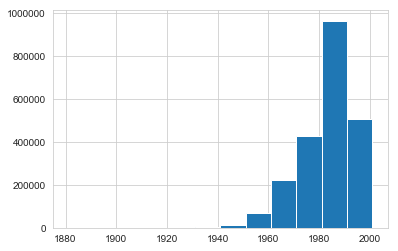

In [201]:
# check hist for any outliers or possible error
bins_edge = np.arange(df_all.member_birth_year.min(), df_all.member_birth_year.max() + 10, 10)
plt.hist(data = df_all, x = "member_birth_year", bins = bins_edge);

> It seems like some observations are over 100 years old, which is questionalble. I will think how to handle the age data later.

In [202]:
# check youngest
df_all.member_birth_year.sort_values(ascending = False).head()

2062405    2000.0
2302496    2000.0
1577120    2000.0
2298833    2000.0
1791982    2000.0
Name: member_birth_year, dtype: float64

In [203]:
# check oldest
df_all.member_birth_year.sort_values(ascending = True).head()

1402838    1881.0
1400283    1881.0
1402687    1881.0
1402215    1881.0
1402346    1881.0
Name: member_birth_year, dtype: float64

## Clean

### Definition
Missing value for station id/ name, birth of year and gender. I will check if I can fill in.

In [204]:
# check missing values
df_all[df_all.isnull().any(axis = 1)].sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
2082587,401,2018-10-05 17:26:12.6520,2018-10-05 17:32:54.6290,NaN,NaN,37.420000,-121.950000,NaN,NaN,37.410000,-121.960000,4148,Customer,2000.0,Female,No
1089787,273,2018-05-10 07:28:04.1870,2018-05-10 07:32:38.1140,205.0,Shafter Ave at Cavour St,37.837947,-122.257243,171.0,Rockridge BART Station,37.844279,-122.251900,1115,Subscriber,NaN,NaN,No
1865312,3205,2018-09-10 13:53:21.6250,2018-09-10 14:46:47.2150,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,323.0,Broadway at Kearny,37.798014,-122.405950,1756,Customer,NaN,NaN,No
994959,651,2018-05-26 10:50:20.7820,2018-05-26 11:01:12.6260,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,252,Customer,NaN,NaN,No
793746,446,2018-03-12 11:40:03.2490,2018-03-12 11:47:29.4400,19.0,Post St at Kearny St,37.788975,-122.403452,16.0,Steuart St at Market St,37.794130,-122.394430,2783,Customer,NaN,NaN,No
265137,799,2017-10-08 10:12:54.6140,2017-10-08 10:26:13.6730,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2645,Customer,NaN,NaN,No
1420312,539,2018-07-19 14:14:05.3250,2018-07-19 14:23:04.6610,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,1140,Customer,NaN,NaN,No
1529332,946,2018-07-02 18:36:27.1260,2018-07-02 18:52:13.2930,323.0,Broadway at Kearny,37.798014,-122.405950,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3744,Subscriber,NaN,NaN,No
186331,1337,2017-10-31 02:46:05.5820,2017-10-31 03:08:23.2040,50.0,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1269,Customer,NaN,NaN,No
1112598,1277,2018-05-06 10:41:09.1340,2018-05-06 11:02:26.1710,345.0,Hubbell St at 16th St,37.766474,-122.398295,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,2178,Customer,NaN,NaN,No


In [205]:
# check summary statistic
df_all.member_birth_year.describe()

count    2.206162e+06
mean     1.982537e+03
std      1.051346e+01
min      1.881000e+03
25%      1.977000e+03
50%      1.985000e+03
75%      1.990000e+03
max      2.000000e+03
Name: member_birth_year, dtype: float64

> As it is difficult to get information, I will leave the missing value for now. A station name may be able to identify with the given latitude and longitude.

In [206]:
# find most common combination
df_all[df_all.start_station_id.isnull()].groupby(["start_station_latitude", "start_station_longitude"]).size().sort_values(ascending = False).head(10)

start_station_latitude  start_station_longitude
37.41                   -121.94                    2104
37.40                   -121.94                    1588
                        -121.93                    1427
37.41                   -121.96                    1240
37.40                   -121.92                    1162
37.41                   -121.95                     961
37.42                   -121.96                     668
37.39                   -121.93                     584
37.41                   -121.93                     470
37.42                   -121.95                     335
dtype: int64

https://www.latlong.net/Show-Latitude-Longitude.html & https://member.fordgobike.com/map/
37.41 -121.94 = Baypointe Parkway, San Jose, California 95134, United States of America
37.40 -121.94 = 3331 N 1st St, San Jose, California 95134, United States
37.40 -121.93 = Central San Jose, San Jose, California 95125, United States of America
37.41 -121.96 = not found
37.40 -121.92 = Epic, 600 Epic Way, San Jose, California 95134, United States of America
37.42 -121.96 = not found
37.39 -121.93 = 2704 North 1st Street, San Jose, California 95134, United States of America
37.41 -121.93 = not found
37.42 -121.95 = not found
37.38 -121.93 = 2509 Orchard Parkway, San Jose, California 95131, United States of America

> there is a tendency that missing station name is data from San Jose. I will leave it as I can us other part of data even though the data is from other city.

### Clean

### Definition

Extract start/end year, month, day and time from the start / end time columns

In [207]:
# convert data type
df_all["start_time"] = pd.to_datetime(df_all.start_time)
df_all["end_time"] = pd.to_datetime(df_all.end_time)

In [208]:
# create new columns
df_all["start_date"] = df_all.start_time.dt.date
df_all["start_hour"] = df_all.start_time.dt.hour
df_all["start_min"] = df_all.start_time.dt.minute

df_all["end_date"] = df_all.end_time.dt.date
df_all["end_hour"] = df_all.end_time.dt.hour
df_all["end_min"] = df_all.end_time.dt.minute

In [209]:
# create date columns
df_all["start_date"] = pd.to_datetime(df_all.start_date)
df_all["end_date"] = pd.to_datetime(df_all.end_date)

In [210]:
# create weekday column and convert it to string
df_all["start_weekday"] = df_all.start_date.dt.dayofweek
df_all["start_weekday"] = df_all["start_weekday"].replace({0:"Mon",
                                                          1:"Tue",
                                                          2:"Wed",
                                                          3:"Thu",
                                                          4:"Fri",
                                                          5:"Sat",
                                                          6:"Sun"})

In [211]:
# drop start time and end time
df_all.drop(columns = ["start_time", "end_time"], axis = 1, inplace = True)

### Test

In [212]:
# check
df_all.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour,start_min,end_date,end_hour,end_min,start_weekday
0,80110,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,...,1987.0,Male,No,2017-12-31,16,57,2018-01-01,15,12,Sun
1,78800,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,...,1965.0,Female,No,2017-12-31,15,56,2018-01-01,13,49,Sun
2,45768,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,...,NaN,NaN,No,2017-12-31,22,45,2018-01-01,11,28,Sun
3,62172,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,...,NaN,NaN,No,2017-12-31,17,31,2018-01-01,10,47,Sun
4,43603,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,...,1997.0,Female,No,2017-12-31,14,23,2018-01-01,2,29,Sun


## Clean
### Definition

Create a new column for usage duration in minitues. Then delet the duration_sec column.

In [213]:
# create min usage column
df_all["duration_min"] = df_all["duration_sec"] / 60

In [214]:
# drop min
df_all.drop("duration_sec", axis = 1, inplace = True)

## Test

In [215]:
# check
df_all.columns

Index(['start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_date', 'start_hour', 'start_min', 'end_date', 'end_hour',
       'end_min', 'start_weekday', 'duration_min'],
      dtype='object')

## Clean
### Definition

Create a new column for age. current year - date of birth

In [216]:
# create age column # data is from June 2017 to December 2018
df_all["age"] = 2018 - df_all.member_birth_year
df_all.drop("member_birth_year", axis = 1, inplace = True)

## Test

In [217]:
# check
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 21 columns):
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_gender              object
bike_share_for_all_trip    object
start_date                 datetime64[ns]
start_hour                 int64
start_min                  int64
end_date                   datetime64[ns]
end_hour                   int64
end_min                    int64
start_weekday              object
duration_min               float64
age                        float64
dtypes: datetime64[ns](2), float64(8), int64(5), object(6)
memory usage: 381.9+ MB


> Accordning to Ford GObike service agreement, the user must be older than 18 years old.

## Clean

### Definition 
several columns have wrong data types. Convert them.

In [218]:
# convert data types
df_all["start_station_id"] = df_all["start_station_id"].astype("str")
df_all["end_station_id"] = df_all["end_station_id"].astype("str")
df_all["bike_id"] = df_all["bike_id"].astype("str")
df_all["member_gender"] = df_all["member_gender"].astype("category")
df_all["bike_share_for_all_trip"] = df_all["bike_share_for_all_trip"].astype("category")
df_all["start_weekday"] = df_all["start_weekday"].astype("category")

## Test

In [219]:
# check
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 21 columns):
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_gender              category
bike_share_for_all_trip    category
start_date                 datetime64[ns]
start_hour                 int64
start_min                  int64
end_date                   datetime64[ns]
end_hour                   int64
end_min                    int64
start_weekday              category
duration_min               float64
age                        float64
dtypes: category(3), datetime64[ns](2), float64(6), int64(4), object(6)
memory usage: 334.1+ MB


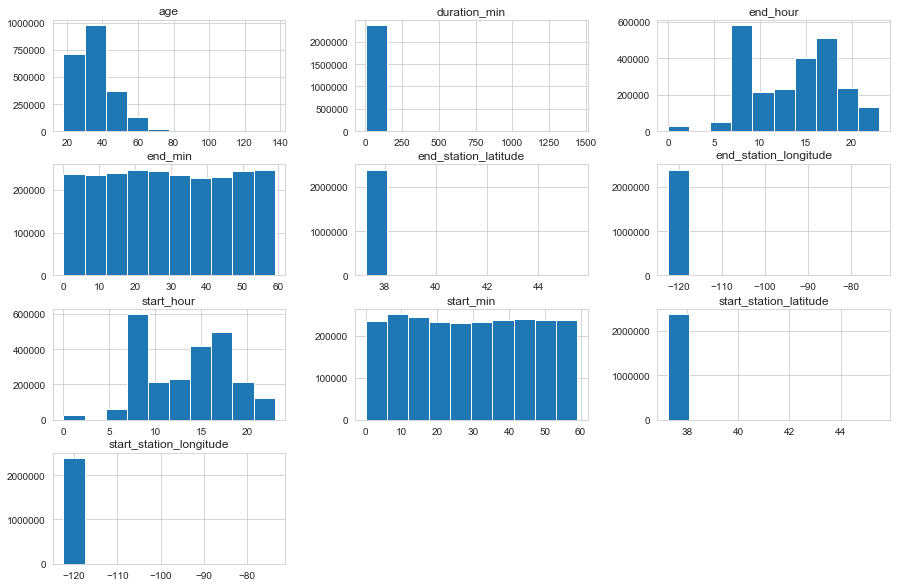

In [220]:
# check qucik histogram
df_all.hist(figsize=[15, 10]);

> Outlier of Latitude and Longitude are the data with a missing station name. The data is from the next city.<p></p>
> Age and start hour can be interesting to look at.

### What is/are the main feature(s) of interest in your dataset?

- What kind of people are using this service?
- How long do people use the service per trip?
- when is do people use the service?
- Where (which) is the most frequently used station?
- What kind of changes can be seen over time?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Gender, age, bike_share_for_all_trip, user type, start_hour, weekday, month, date 
> With these variables I should be able to find some insights.

## Univariate Exploration


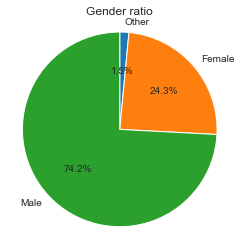

In [221]:
# plot gender
gender = df_all.groupby("member_gender").size()
sorted_counts = gender.sort_values()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct = '%1.1f%%')
plt.axis("square")
plt.title("Gender ratio");

> more than 70% of user are male. Now I am going to check user age.

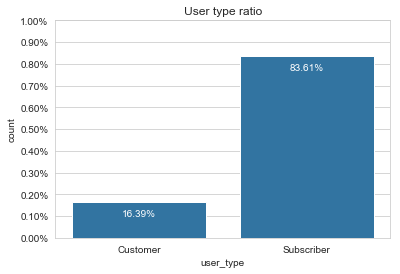

In [222]:
# check customer type
# get base blue color
base_color = sns.color_palette()[0]
sns.countplot(data = df_all, x = "user_type", color = base_color)

# create % annot

n_point = df_all.shape[0]
cat_counts = df_all["user_type"].value_counts()
# get the current x location and label
locs, labels = plt.xticks()

# loop through each pair of location and label
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100 * count / n_point)
    plt.text(loc, count-150000, pct_string, ha = 'center', color = 'w')

# get % in y axis
max_counts = df_all["user_type"].value_counts().max()
max_prop = max_counts / n_point
tick_props = np.arange(0, max_prop + 0.2, 0.1)
tick_names = ['{:0.2f}%'.format(v) for v in tick_props]
plt.yticks(tick_props * n_point, tick_names)

plt.title("User type ratio");

> More than 80% of people are  subscriber.

Text(0.5, 1.0, 'Ratio of Bike share for all trip service member')

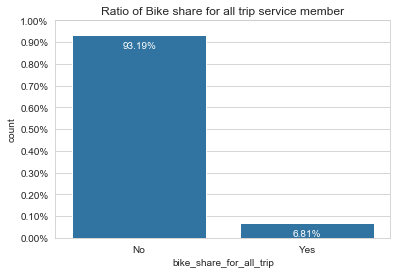

In [223]:
# bike share service

base_palette = sns.color_palette()[0]
sns.countplot(data = df_all, x = "bike_share_for_all_trip", color = base_color)

# get % y axis

n_point = df_all.shape[0]
max_count = df_all["bike_share_for_all_trip"].value_counts().max()
max_prop = max_count / n_point

tick_props = np.arange(0, max_prop + 0.1, 0.1)
tcik_names = ['{:0.2f}%'.format(v) for v in tick_props]
plt.yticks(tick_props * n_point, tick_names)

# get x %
cat_counts = df_all["bike_share_for_all_trip"].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100 * count / n_point)
    plt.text(loc, count - 140000, pct_string, ha = "center", color = "w")

plt.title("Ratio of Bike share for all trip service member")


> More than 90% of user is not part of the bike_share_for_all_trip. This makes sense as the service is only for people qualify for sertain requirements. https://www.fordgobike.com/pricing/bikeshareforall

In [224]:
# age summary statistic
df_all.age.describe()

count    2.206162e+06
mean     3.546318e+01
std      1.051346e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      1.370000e+02
Name: age, dtype: float64

> It makes sense that a start age is 18, as the Ford GoBike terms and condition insists that user has to be at least 18. However, people with 137 years old are questionable.

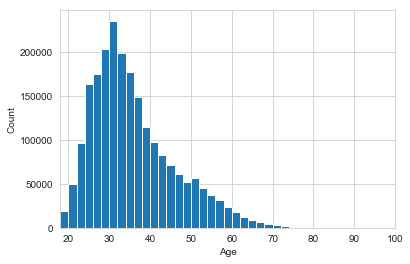

In [225]:
# plot hist
bin_edges = np.arange(18, df_all.age.max() +2, 2)

# set lims between 18 years old and 100
plt.xlim(18, 100)
plt.hist(data = df_all, x = "age", bins = bin_edges)
plt.xlabel("Age")
plt.ylabel("Count");

> A peak is around at 30 years old and the distribution is skewed.

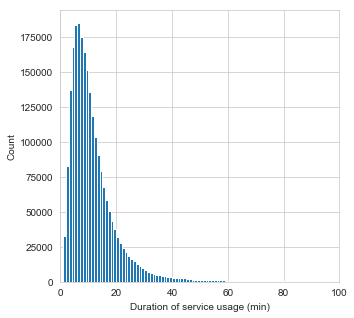

In [226]:
# hist service usage time per trip
plt.figure(figsize=[5, 5])

# 1 min bins
bin_edges = np.arange(0, df_all["duration_min"].max() + 1, 1)
# focus on data below 100 min
plt.xlim(0, 100)
plt.hist(data = df_all, x = "duration_min", bins = bin_edges)
plt.xlabel("Duration of service usage (min)")
plt.ylabel("Count");

In [227]:
# check summary statistic
df_all["duration_min"].describe()

count    2.383421e+06
mean     1.516677e+01
std      4.406442e+01
min      1.016667e+00
25%      5.950000e+00
50%      9.400000e+00
75%      1.475000e+01
max      1.439483e+03
Name: duration_min, dtype: float64

> According to the official website (https://www.fordgobike.com/pricing), their are 4 major types of pricing.
<ol>
    <li>2 dollar per trip / max 30 min</li>
    <li>10 dollar a day / unlimited 30 min ride</li>
    <li>15 dollar a month / unlimited 45min trips</li>
    <li>Bike Share For All 5 dollar for the first year / 60 min trip</li>

> Looking at the price systems, it makes sense that a peak is below 30min and there are some user for around 40 to 45 minutes uses as well as around 60 min uses.

Text(0.5, 1.0, 'Weekdays usage frequency')

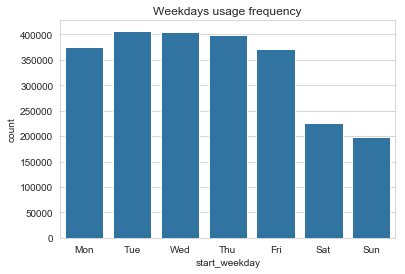

In [228]:
# set category order
level_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)

# assign the order
df_all["start_weekday"] = df_all["start_weekday"].astype(ordered_cat)

# plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_all, x = "start_weekday", color = base_color)
plt.title("Weekdays usage frequency")

> There are less users on weekends. Tuesday, Wednesday and Thursday are the most popular weekdays.

In [229]:
df_all.head()

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,...,bike_share_for_all_trip,start_date,start_hour,start_min,end_date,end_hour,end_min,start_weekday,duration_min,age
0,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,...,No,2017-12-31,16,57,2018-01-01,15,12,Sun,1335.166667,31.0
1,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,...,No,2017-12-31,15,56,2018-01-01,13,49,Sun,1313.333333,53.0
2,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,...,No,2017-12-31,22,45,2018-01-01,11,28,Sun,762.800000,NaN
3,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,...,No,2017-12-31,17,31,2018-01-01,10,47,Sun,1036.200000,NaN
4,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,...,No,2017-12-31,14,23,2018-01-01,2,29,Sun,726.716667,21.0


In [230]:
# function to round up
def round_up(col):
    ''' if time is more than 30 minutes, round up'''
    if col > 30:
        return 1
    else:
        return 0

# round up start hour and delete columns which I will not use
df_all["start_hour"] = df_all["start_hour"] + df_all["start_min"].apply(round_up)
df_all.drop(columns = ["start_min", "end_hour", "end_min"], axis = 1, inplace = True)

In [231]:
# change 25 to 0 am
df_all.loc[df_all.start_hour == 25, "start_hour"] = 0

In [232]:
# test
df_all.columns

Index(['start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'start_date', 'start_hour',
       'end_date', 'start_weekday', 'duration_min', 'age'],
      dtype='object')

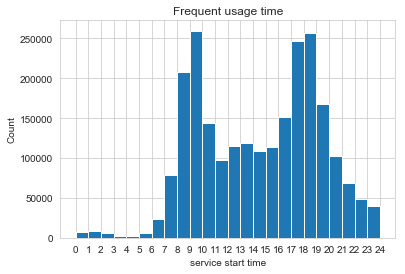

In [233]:
bin_edges = np.arange(0, 24 +1, 1)
plt.hist(data = df_all, x = "start_hour", bins = bin_edges)
plt.xticks(np.arange(0, 24 +1))
plt.title("Frequent usage time")
plt.xlabel("service start time")
plt.ylabel("Count");

>There are 2 peaks which are between 8 to 11 and between 17 to 20. People are using the service to commute to work and college or University??

In [234]:
df_all.groupby("user_type").mean().duration_min

user_type
Customer      35.037661
Subscriber    11.271565
Name: duration_min, dtype: float64

> A customer type (causal usage) has more longer usage time in average. 

In [235]:
df_all.groupby("bike_share_for_all_trip").mean().duration_min

bike_share_for_all_trip
No     15.351004
Yes    12.646077
Name: duration_min, dtype: float64

> Even though the bike_share_for_all_trip entitled user can use the service longer per trip, non- entitled user rides more in average.

In [238]:
date = df_all.groupby("start_date").size()

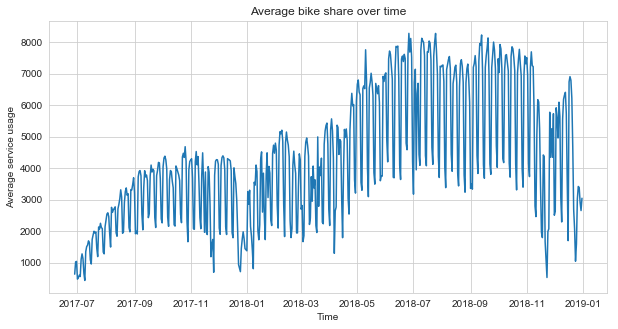

In [249]:
# plot average bike share over time
plt.figure(figsize=[10, 5])

# plot
sns.lineplot(data = date)

# set title and labels
plt.title("Average bike share over time")
plt.xlabel("Time")
plt.ylabel("Average service usage");
